In [ ]:
                                                 Support Vector Machine 

In [ ]:
SVM kya hota hai:-
                  SVM ek supervised machine learning algorithm hai.jo mainly classification aur regression problems ke liye use hota hai.

Simple words me idea :-
                      Socho tumhare paas 2 type ka data hai (jaise spam / not spam, pass / fail). 
                      SVM ka kaam hota hai ek aisi line (2D), plane (3D) ya boundary banana jo dono classes ko maximum distance ke saath alag kare.

In [ ]:
Support Vector ka matlab :-
                            Jo data points boundary ke sabse paas hote hain,
                            unko Support Vectors kehte hain. Ye points hi decide karte hain ki boundary kahan banegi.

Margin kya hota hai:-
                        Boundary aur closest data points ke beech ka distance = Margin SVM hamesha maximum margin wali boundary banata hai
                        Isse model zyada accurate aur stable hota hai

In [ ]:
Real-world example:- (Loan Approval)
Data: Income, Credit Score

Output: Loan Approved / Rejected

SVM:
Dono categories ke beech best possible line draw karta hai

Jo log boundary ke paas hote hain, wahi support vectors hote hain

In [ ]:
Tune parameters:
1. Regularization (C)
2. Gamma
3. Kernel

In [ ]:
Diffrents Between SVR VS SVC
1. SVR( Supprot Vector Regression): yei jada tar numric prediction ke liye use hota hai(ex: price,ya othes)
2.SVC (Support Vector Classfication) : yei jada tar catrical prediction ke liye use hota hai( ex:yes,no or pass,fail)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\covid_toy.csv")
df.head()
df["fever"].fillna(df["fever"].mean(),inplace=True)
cat = df.select_dtypes(include=["object"]).columns
l  = LabelEncoder()
for col in cat:
    df[col] = l.fit_transform(df[col])
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13652\147709820.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fever"].fillna(df["fever"].mean(),inplace=True)


,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
2,42,1,101.0,0,1,0
3,31,0,98.0,0,2,0
4,65,0,101.0,0,3,0


In [41]:
X = df.drop("fever",axis=1)
y = df["fever"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Scaling (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# SVM Regressor
svm_model = SVR(kernel="rbf", C=100, gamma="scale") # kernel = rbf(raudial basis function) its use when your data is not seedhi line me na ho balki thoda complax ho ya curved ho
svm_model.fit(X_train, y_train)                     # C =100 yei model ki power dicied karta hai c jitna bada hoga model ke error utne hi kam honge

                                                  # gamma = scale(model khud hi iska matalb hai ki data ki variance dhek kar khud usse set kare
# Prediction
y_pred = svm_model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: -2.2441981454948254
MAE: 2.685744297326799


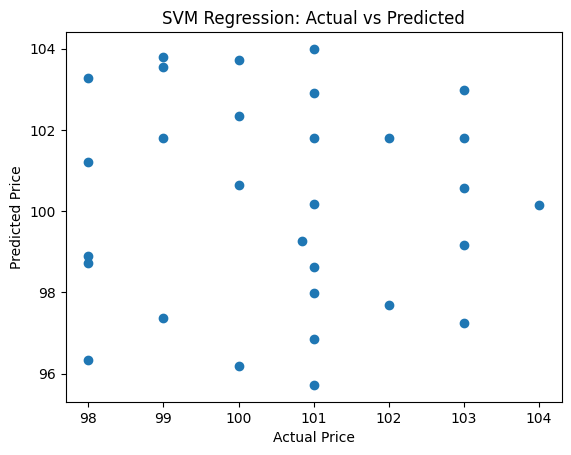

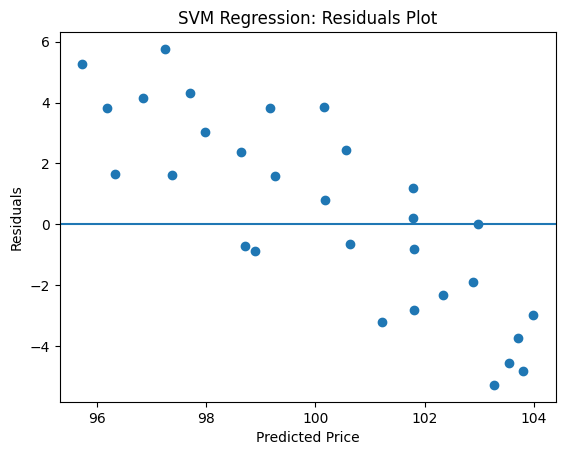

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SVM Regression: Actual vs Predicted")
plt.show()

# -------- Plot 2: Residuals --------
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("SVM Regression: Residuals Plot")
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df["target"]= iris.target 
df.head()
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [5]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [7]:
df0= df[:50]
df1= df[50:100]
df2 = df[100:]
import matplotlib.pyplot as plt
%matplotlib inline

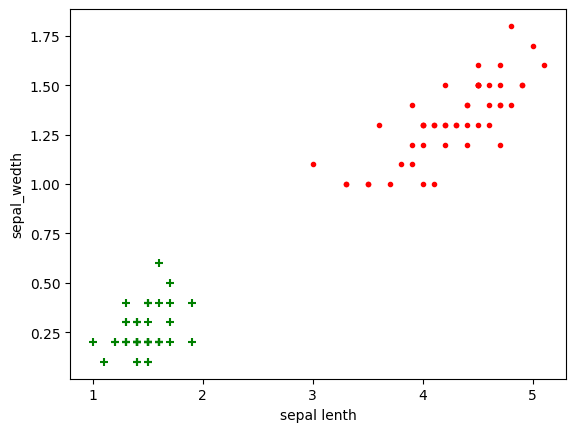

In [8]:

plt.xlabel("sepal lenth")
plt.ylabel("sepal_wedth")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],color="green",marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],color="red",marker=".")

In [ ]:
Train Using Support Vector Machine (SVM):

In [21]:

X = df.drop(['target','flower_name'], axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()
len(X_train)
len(X_test)

30

In [22]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [23]:
model.score(X_test, y_test)

0.9666666666666667

In [19]:
model.predict([[4.8,3.0,2.5,0.3]])

C:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Tune parameters

1. Regularization (C)


In [24]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [ ]:
2. Gamma

In [25]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

In [ ]:
3. Kernel

In [27]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)
model_linear_kernal.score(X_test, y_test)

1.0

In [ ]:
Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

Measure accuracy of your model using different kernels such as rbf and linear.
Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
Use 80% of samples as training data size

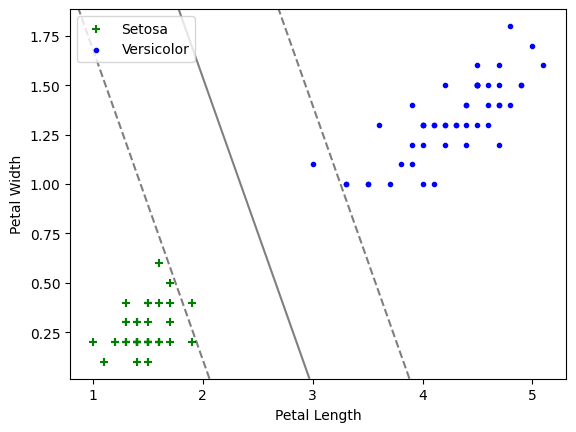

In [24]:
# by gemini ai
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare the data (combining your dataframes)
X = np.append(df0[['petal length (cm)', 'petal width (cm)']], 
              df1[['petal length (cm)', 'petal width (cm)']], axis=0)
y = np.append(np.zeros(len(df0)), np.ones(len(df1)))

# 2. Fit the SVM Model
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# 3. Create the scatter plot
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker='+', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="blue", marker='.', label='Versicolor')

# 4. Drawing the Decision Boundary (The Line)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary (the line) and margins (dotted lines)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()